### Linear Classification

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
npzfile = np.load("./data/toy_data_two_moon.npz")

# Splitting the data into training and testing sets
X_train = torch.FloatTensor(npzfile["arr_0"])
Y_train = torch.FloatTensor(npzfile["arr_2"])

X_test = torch.FloatTensor(npzfile["arr_1"])
Y_test = torch.FloatTensor(npzfile["arr_3"])

# Checking the shapes of the datasets
print(f"X_train shape : {X_train[:5]}")
print(f"Y_train shape : {Y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"Y_test shape : {Y_test.shape}")

X_train shape : tensor([[ 0.6989,  0.6534],
        [-0.2277,  0.2788],
        [ 1.9404,  0.1067],
        [ 1.2986,  0.0680],
        [ 1.2025, -0.5864]])
Y_train shape : torch.Size([600, 1])
X_test shape : torch.Size([400, 2])
Y_test shape : torch.Size([400, 1])


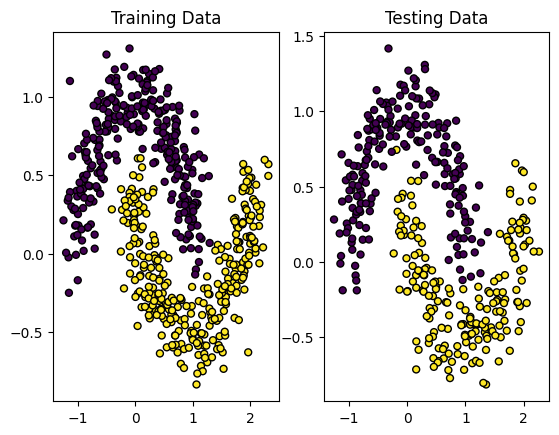

In [12]:
plt.subplot(121)
plt.scatter(X_train[:, 0] , X_train[:, 1] , c = Y_train[:, 0]  , marker='o' , edgecolor='k' , s=25)
plt.title("Training Data")
plt.subplot(122)
plt.scatter(X_test[:, 0] , X_test[:, 1] , c = Y_test[:, 0]  , marker='o' , edgecolor='k' , s=25)
plt.title("Testing Data")
plt.show()

In [21]:
linear = nn.Linear(2 , 1)  # 2 input features and 1 output feature
loss = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters() , lr=0.01)

loss_history = []

for epoch in range(1000):
    # Evaluation on test data (we don't want to update weights here)
    with torch.no_grad():
        y_pred = linear(X_test)
        l = loss(y_pred , Y_test)
        loss_history.append(l.item())
    
    y_pred = linear(X_train)
    l = loss(y_pred , Y_train)
    linear.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch} : Loss = {l.item():2f}")



Epoch 0 : Loss = 0.451756
Epoch 100 : Loss = 0.257597
Epoch 200 : Loss = 0.177412
Epoch 300 : Loss = 0.135984
Epoch 400 : Loss = 0.114386
Epoch 500 : Loss = 0.103112
Epoch 600 : Loss = 0.097226
Epoch 700 : Loss = 0.094152
Epoch 800 : Loss = 0.092547
Epoch 900 : Loss = 0.091709


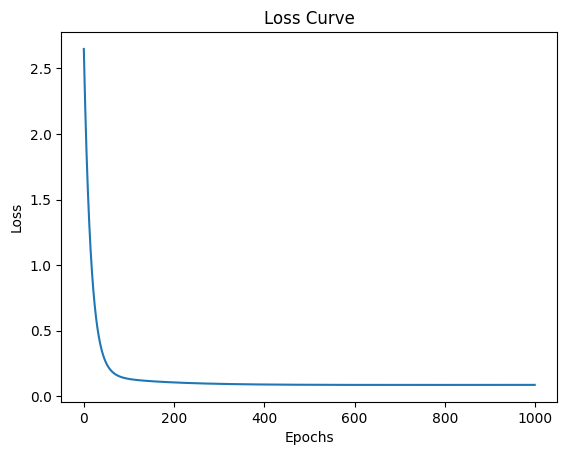

In [18]:

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

- In case of logistic regression we used sigmoid function to classify the data into two classes and binary cross entropy for loss calculation.
- But what if we have more than two classes to classify?
- We can use softmax function to classify the data into multiple classes and categorical cross entropy for loss calculation.